In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


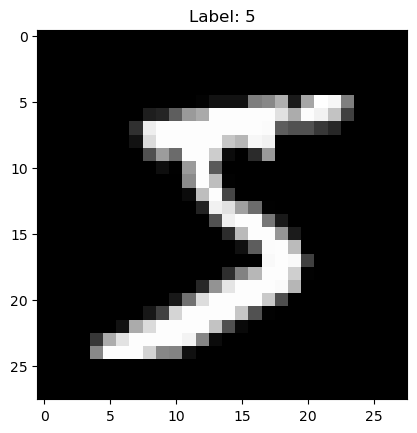

In [20]:
#image
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [21]:
# Normalizing pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0
#Reshaping for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [22]:
#One-hot encoding labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Preprocessing complete.")

Preprocessing complete.


In [6]:
#Definding CNN architecture

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Compiling model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled.")

Model compiled.


In [10]:
#Training Model

In [25]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128)

print("Training complete.")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.7915 - loss: 0.6555 - val_accuracy: 0.9782 - val_loss: 0.0650
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9691 - loss: 0.1055 - val_accuracy: 0.9863 - val_loss: 0.0405
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9793 - loss: 0.0727 - val_accuracy: 0.9894 - val_loss: 0.0311
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9835 - loss: 0.0536 - val_accuracy: 0.9902 - val_loss: 0.0294
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9856 - loss: 0.0464 - val_accuracy: 0.9917 - val_loss: 0.0246
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9882 - loss: 0.0408 - val_accuracy: 0.9923 - val_loss: 0.0256
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9888 - loss: 0.0369 - val_accuracy: 0.9928 - val_loss: 0.0226
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9896 - loss: 0.0310 - 

In [12]:
#Evaluating Model

In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9896 - loss: 0.0297
Test accuracy: 99.19%


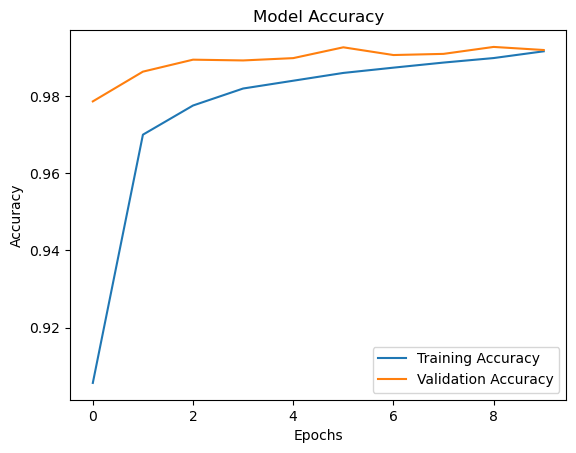

In [14]:
#Visualizing Training History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [15]:
#Making Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


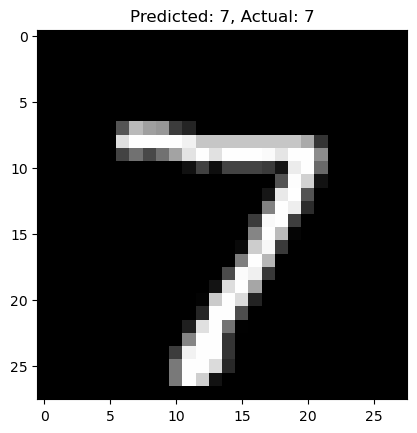

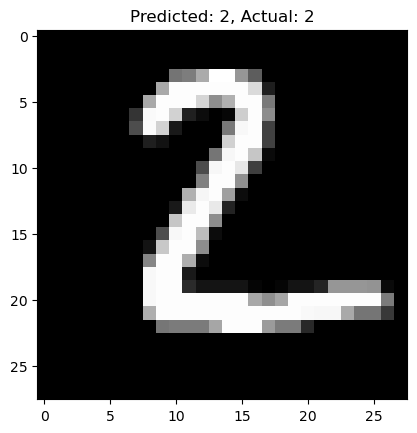

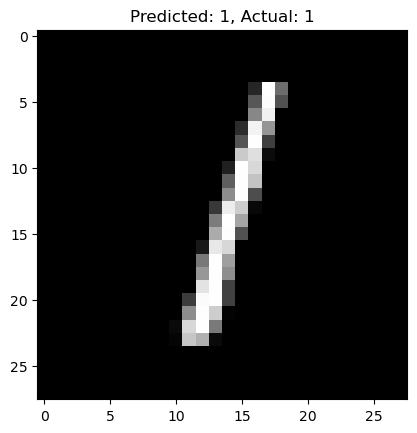

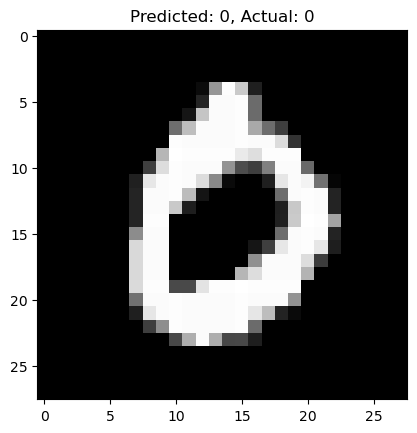

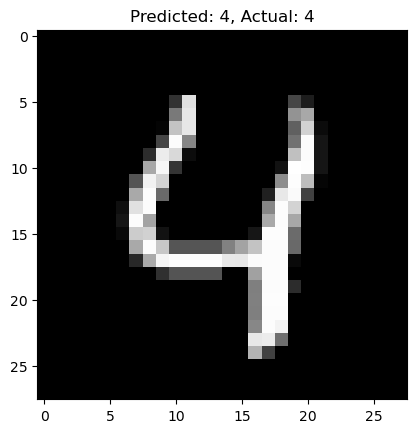

In [16]:
predictions = model.predict(x_test[:5])

#Visualizing predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i].argmax()}")
    plt.show()

In [26]:
# Experimenting with higher learning rate
model_high_lr = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_high_lr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

print("Training with a higher learning rate...")
history_high_lr = model_high_lr.fit(x_train, y_train,
                                    validation_data=(x_test, y_test),
                                    epochs=10,
                                    batch_size=128)

test_loss_high_lr, test_accuracy_high_lr = model_high_lr.evaluate(x_test, y_test)
print(f"Test accuracy with higher learning rate: {test_accuracy_high_lr * 100:.2f}%")


Training with a higher learning rate...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.8570 - loss: 0.4562 - val_accuracy: 0.9790 - val_loss: 0.0705
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9679 - loss: 0.1039 - val_accuracy: 0.9834 - val_loss: 0.0475
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 62ms/step - accuracy: 0.9762 - loss: 0.0817 - val_accuracy: 0.9850 - val_loss: 0.0448
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.9780 - loss: 0.0768 - val_accuracy: 0.9847 - val_loss: 0.0477
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9782 - loss: 0.0729 - val_accuracy: 0.9859 - val_loss: 0.0479
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9793 - loss: 0.0703 - val_accuracy: 0.9878 - val_loss: 0.0470
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9806 - loss: 0.0667 - val_accuracy: 0.9841 - val_loss: 0.0568
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/s

In [28]:
#Introduce Additional Model (MLP)

In [31]:
model_mlp = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(512, activation='relu'), 
    Dropout(0.5),               
    Dense(256, activation='relu'), 
    Dropout(0.5),                   
    Dense(10, activation='softmax') 
])

model_mlp.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("Training the MLP model...")
history_mlp = model_mlp.fit(x_train, y_train,
                            validation_data=(x_test, y_test),
                            epochs=10,
                            batch_size=128)

test_loss_mlp, test_accuracy_mlp = model_mlp.evaluate(x_test, y_test)
print(f"Test accuracy with MLP: {test_accuracy_mlp * 100:.2f}%")


Training the MLP model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7926 - loss: 0.6515 - val_accuracy: 0.9531 - val_loss: 0.1438
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9446 - loss: 0.1857 - val_accuracy: 0.9674 - val_loss: 0.1029
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9583 - loss: 0.1397 - val_accuracy: 0.9742 - val_loss: 0.0819
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9644 - loss: 0.1150 - val_accuracy: 0.9765 - val_loss: 0.0762
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9697 - loss: 0.1031 - val_accuracy: 0.9776 - val_loss: 0.0734
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9718 - loss: 0.0941 - val_accuracy: 0.9802 - val_loss: 0.0654
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9739 - loss: 0.0802 - val_accuracy: 0.9789 - val_loss: 0.0709
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 

In [34]:
test_loss_cnn, test_accuracy_cnn = model.evaluate(x_test, y_test)
print(f"Test accuracy with CNN: {test_accuracy_cnn * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9901 - loss: 0.0314
Test accuracy with CNN: 99.30%


Test accuracy with CNN: 99.30%
Test accuracy with MLP: 98.14%


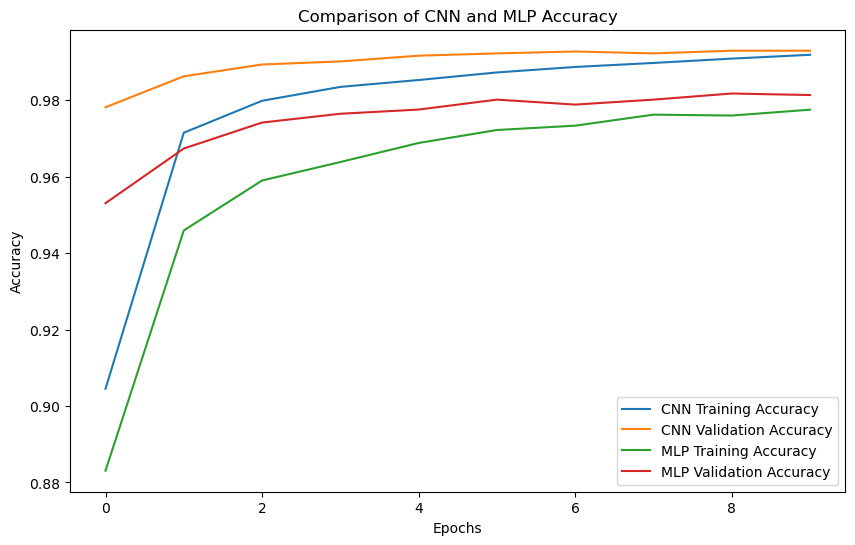

In [35]:
print(f"Test accuracy with CNN: {test_accuracy_cnn * 100:.2f}%")
print(f"Test accuracy with MLP: {test_accuracy_mlp * 100:.2f}%")

plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='CNN Validation Accuracy')

plt.plot(history_mlp.history['accuracy'], label='MLP Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of CNN and MLP Accuracy')
plt.legend()
plt.show()